## Cardiovascular Risk Prediction Project
#### - Aaditya Mahindrakar

#### Cardiovascular risk refers to the likelihood or probability that an individual will develop cardiovascular diseases (CVDs) during their lifetime. Cardiovascular diseases are a group of conditions that affect the heart and blood vessels, and they are a leading cause of morbidity and mortality worldwide. Cardiovascular risk assessment is essential for understanding an individual's susceptibility to these diseases and for implementing preventive measures to reduce their risk.<br>Several factors contribute to cardiovascular risk.

### Problem Statement
#### - Visiting hospitals for regular check-ups it is almost always seen that they encourage people to get special check-ups to identify if they are at risk of heart diseases. Heart diseases have unfortunately become very common. It may be due to various reasons such as lifestyle, work pressure, lack of exercise, etc. In this project, we will be working on predicting the 10-year risk of Coronary Heart Disease (CHD). We are given a set of variables that impact heart diseases. These variables are related to demographic, past, and current medical history.,<br>- The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. <br>- Variables.<br>Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


### Data Dictionary
#### Demographic: <br>• Sex: male or female ("M" or "F") <br>• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous) 
#### Behavioural: <br>• is_smoking: whether or not the patient is a current smoker ("YES" or "NO") <br>• Cigs Per Day: the number of cigarettes that the person smoked on average in one day .(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
#### Medical (history): <br>• BP Meds: whether or not the patient was on blood pressure medication (Nominal) <br>• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) <br>• Prevalent Hyp: whether or not the patient was hypertensive (Nominal) <br>• Diabetes: whether or not the patient had diabetes (Nominal) 
#### Medical(current): <br>• Tot Chol: total cholesterol level (Continuous) <br>• Sys BP: systolic blood pressure (Continuous) • Dia BP: diastolic blood pressure (Continuous) <br>• BMI: Body Mass Index (Continuous) <br>• Heart Rate: heart rate(Continuous - In medical research, variables such as heart rate thought discrete, are considered continuous because of a large number of possible values.) <br>• Glucose: glucose level (Continuous) 
#### Predict variable (desired target): <br>• 10-year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”) – DV

### Assumption Taken For Preprocessing of the Dataset.
#### -To fill missing values in 'education' variable, used 'mode' techique.<br>- Dropping missing values from 'cigsPerDay' feature, because this is a crucial information to predict the risk and if mean, or mode technique is used then the integraty of the data for prediction would be lost.<br>- In approch taken for filling the missing null values from the variable'BPMeds', is considered 1, on the basis of whether the person had 'prevalentStroke' or 'prevalentHyp'. <br>- 'TotChol' = mean is taken for na values.<br>- For na values of the BMI variable, is filled with number '25'. The reference information by Massachusetts Department of Public Health, suggest that the average population in Massachusetts state is in BMI category of 'overweight' which falls under the scale of BMI,the minimum measure is 25.<br>- To determine the 'heartRate' of a 64 year old person, that is in range of 60 - 100, assumed na value = 65 bpm.<br>- The approach taken to missing values in 'glucose' is that, ig the person is diabetic then na value = 126, because this is shooting point of suger to diabetic patient. And if the person is not diabetic then na value = 70 which is normal in healty person.

### Conclusion of the project is at the bottom.

In [1]:
# importing basic packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Necessary packages
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_confusion_matrix

In [3]:
# importing dataset
df = pd.read_csv('data_cardiovascular_risk.csv')
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [5]:
# detcting missing values
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [6]:
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
df['cigsPerDay'].value_counts()

0.0     1703
20.0     606
30.0     176
15.0     172
10.0     106
9.0      104
5.0      103
3.0       79
40.0      62
1.0       48
25.0      44
43.0      42
35.0      17
2.0       17
6.0       14
8.0       10
7.0        8
60.0       8
18.0       7
4.0        7
50.0       6
17.0       5
23.0       5
11.0       4
12.0       3
13.0       3
19.0       2
16.0       2
45.0       2
14.0       1
70.0       1
38.0       1
Name: cigsPerDay, dtype: int64

In [8]:
df['BPMeds'].value_counts()

0.0    3246
1.0     100
Name: BPMeds, dtype: int64

In [9]:
df['education'].value_counts()

1.0    1391
2.0     990
3.0     549
4.0     373
Name: education, dtype: int64

In [10]:
# Using Mode technique to fill na values
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [11]:
df['education'] = df['education'].astype(int)

In [12]:
df['education'].value_counts()

1    1478
2     990
3     549
4     373
Name: education, dtype: int64

In [13]:
# Dropping missing values from 'cigsPerDay' feature
df.dropna(subset=['cigsPerDay'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3368 non-null   int64  
 1   age              3368 non-null   int64  
 2   education        3368 non-null   int32  
 3   sex              3368 non-null   object 
 4   is_smoking       3368 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3324 non-null   float64
 7   prevalentStroke  3368 non-null   int64  
 8   prevalentHyp     3368 non-null   int64  
 9   diabetes         3368 non-null   int64  
 10  totChol          3330 non-null   float64
 11  sysBP            3368 non-null   float64
 12  diaBP            3368 non-null   float64
 13  BMI              3354 non-null   float64
 14  heartRate        3367 non-null   float64
 15  glucose          3067 non-null   float64
 16  TenYearCHD       3368 non-null   int64  
dtypes: float64(8),

In [15]:
# filling na values opf 'BPMdes' with condition 
df['BPMeds'].fillna((df['prevalentStroke'] | df['prevalentHyp']).astype(int), inplace=True)

In [16]:
df.isna().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            301
TenYearCHD           0
dtype: int64

In [17]:
# using mean to fill na values in 'totChol'
df['totChol'].fillna(df['totChol'].mean(), inplace=True)

In [18]:
# Fillinh missing values in 'BMI' with 25 (Average population of Massachussettes is overwight )
df['BMI'].fillna(25, inplace=True)

In [19]:
# Heartrate of of a 64 year old man on the range of 60-100
df['heartRate'].fillna(65, inplace=True)

In [20]:
#df['glucose'] = df['glucose'].fillna(126).where(df['diabetes'] == 1, other=70)

In [21]:
#The approach taken to missing values in 'glucose' is that,
#if the person is diabetic then na value = 126, because this is shooting point of suger to diabetic patient. 
#And if the person is not diabetic then na value = 70 which is normal in healty person.
df['glucose'] = df.apply(lambda row: 126 if row['diabetes'] == 1 and pd.isna(row['glucose']) else (70 if row['diabetes'] == 0 and pd.isna(row['glucose']) else row['glucose']), axis=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3368 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3368 non-null   int64  
 1   age              3368 non-null   int64  
 2   education        3368 non-null   int32  
 3   sex              3368 non-null   object 
 4   is_smoking       3368 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3368 non-null   float64
 7   prevalentStroke  3368 non-null   int64  
 8   prevalentHyp     3368 non-null   int64  
 9   diabetes         3368 non-null   int64  
 10  totChol          3368 non-null   float64
 11  sysBP            3368 non-null   float64
 12  diaBP            3368 non-null   float64
 13  BMI              3368 non-null   float64
 14  heartRate        3368 non-null   float64
 15  glucose          3368 non-null   float64
 16  TenYearCHD       3368 non-null   int64  
dtypes: float64(8),

In [23]:
# converting the object/boolean features to integers features
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['is_smoking'] = df['is_smoking'].map({'YES': 1, 'NO': 0})

In [24]:
# Represinting categorical columns to the data
df['education'] = df['education'].astype('category') 
df['sex'] = df['sex'].astype('category') 
df['is_smoking'] = df['is_smoking'].astype('category') 
df['BPMeds'] = df['BPMeds'].astype('category')
df['prevalentStroke'] = df['prevalentStroke'].astype('category')
df['prevalentHyp'] = df['prevalentHyp'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')

In [25]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.00,90.0,80.0,1
1,1,36,4,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1,1,0,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4,1,1,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2,0,1,20.0,0.0,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2,0,0,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,70.0,0


In [26]:
df.describe()

,id,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3368.000000,3368.000000,3368.000000,3368.000000,3368.000000,3368.00000,3368.000000,3368.000000,3368.000000,3368.000000
mean,1693.292755,49.543646,9.069477,237.025826,132.601395,82.88465,25.795157,75.971793,81.027910,0.151425
std,978.714877,8.603941,11.879078,44.950607,22.300647,12.02176,4.115208,11.967637,23.460065,0.358516
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.00000,15.960000,45.000000,40.000000,0.000000
25%,847.750000,42.000000,0.000000,206.000000,117.000000,74.50000,23.030000,68.000000,70.000000,0.000000
50%,1692.500000,49.000000,0.000000,235.000000,128.500000,82.00000,25.370000,75.000000,77.000000,0.000000
75%,2540.250000,56.000000,20.000000,264.000000,144.000000,90.00000,28.025000,83.000000,85.000000,0.000000
max,3389.000000,70.000000,70.000000,696.000000,295.000000,142.50000,56.800000,143.000000,394.000000,1.000000


In [27]:
# Checking the dataset whether it is balanced or not
print(df['TenYearCHD'].value_counts())

0    2858
1     510
Name: TenYearCHD, dtype: int64


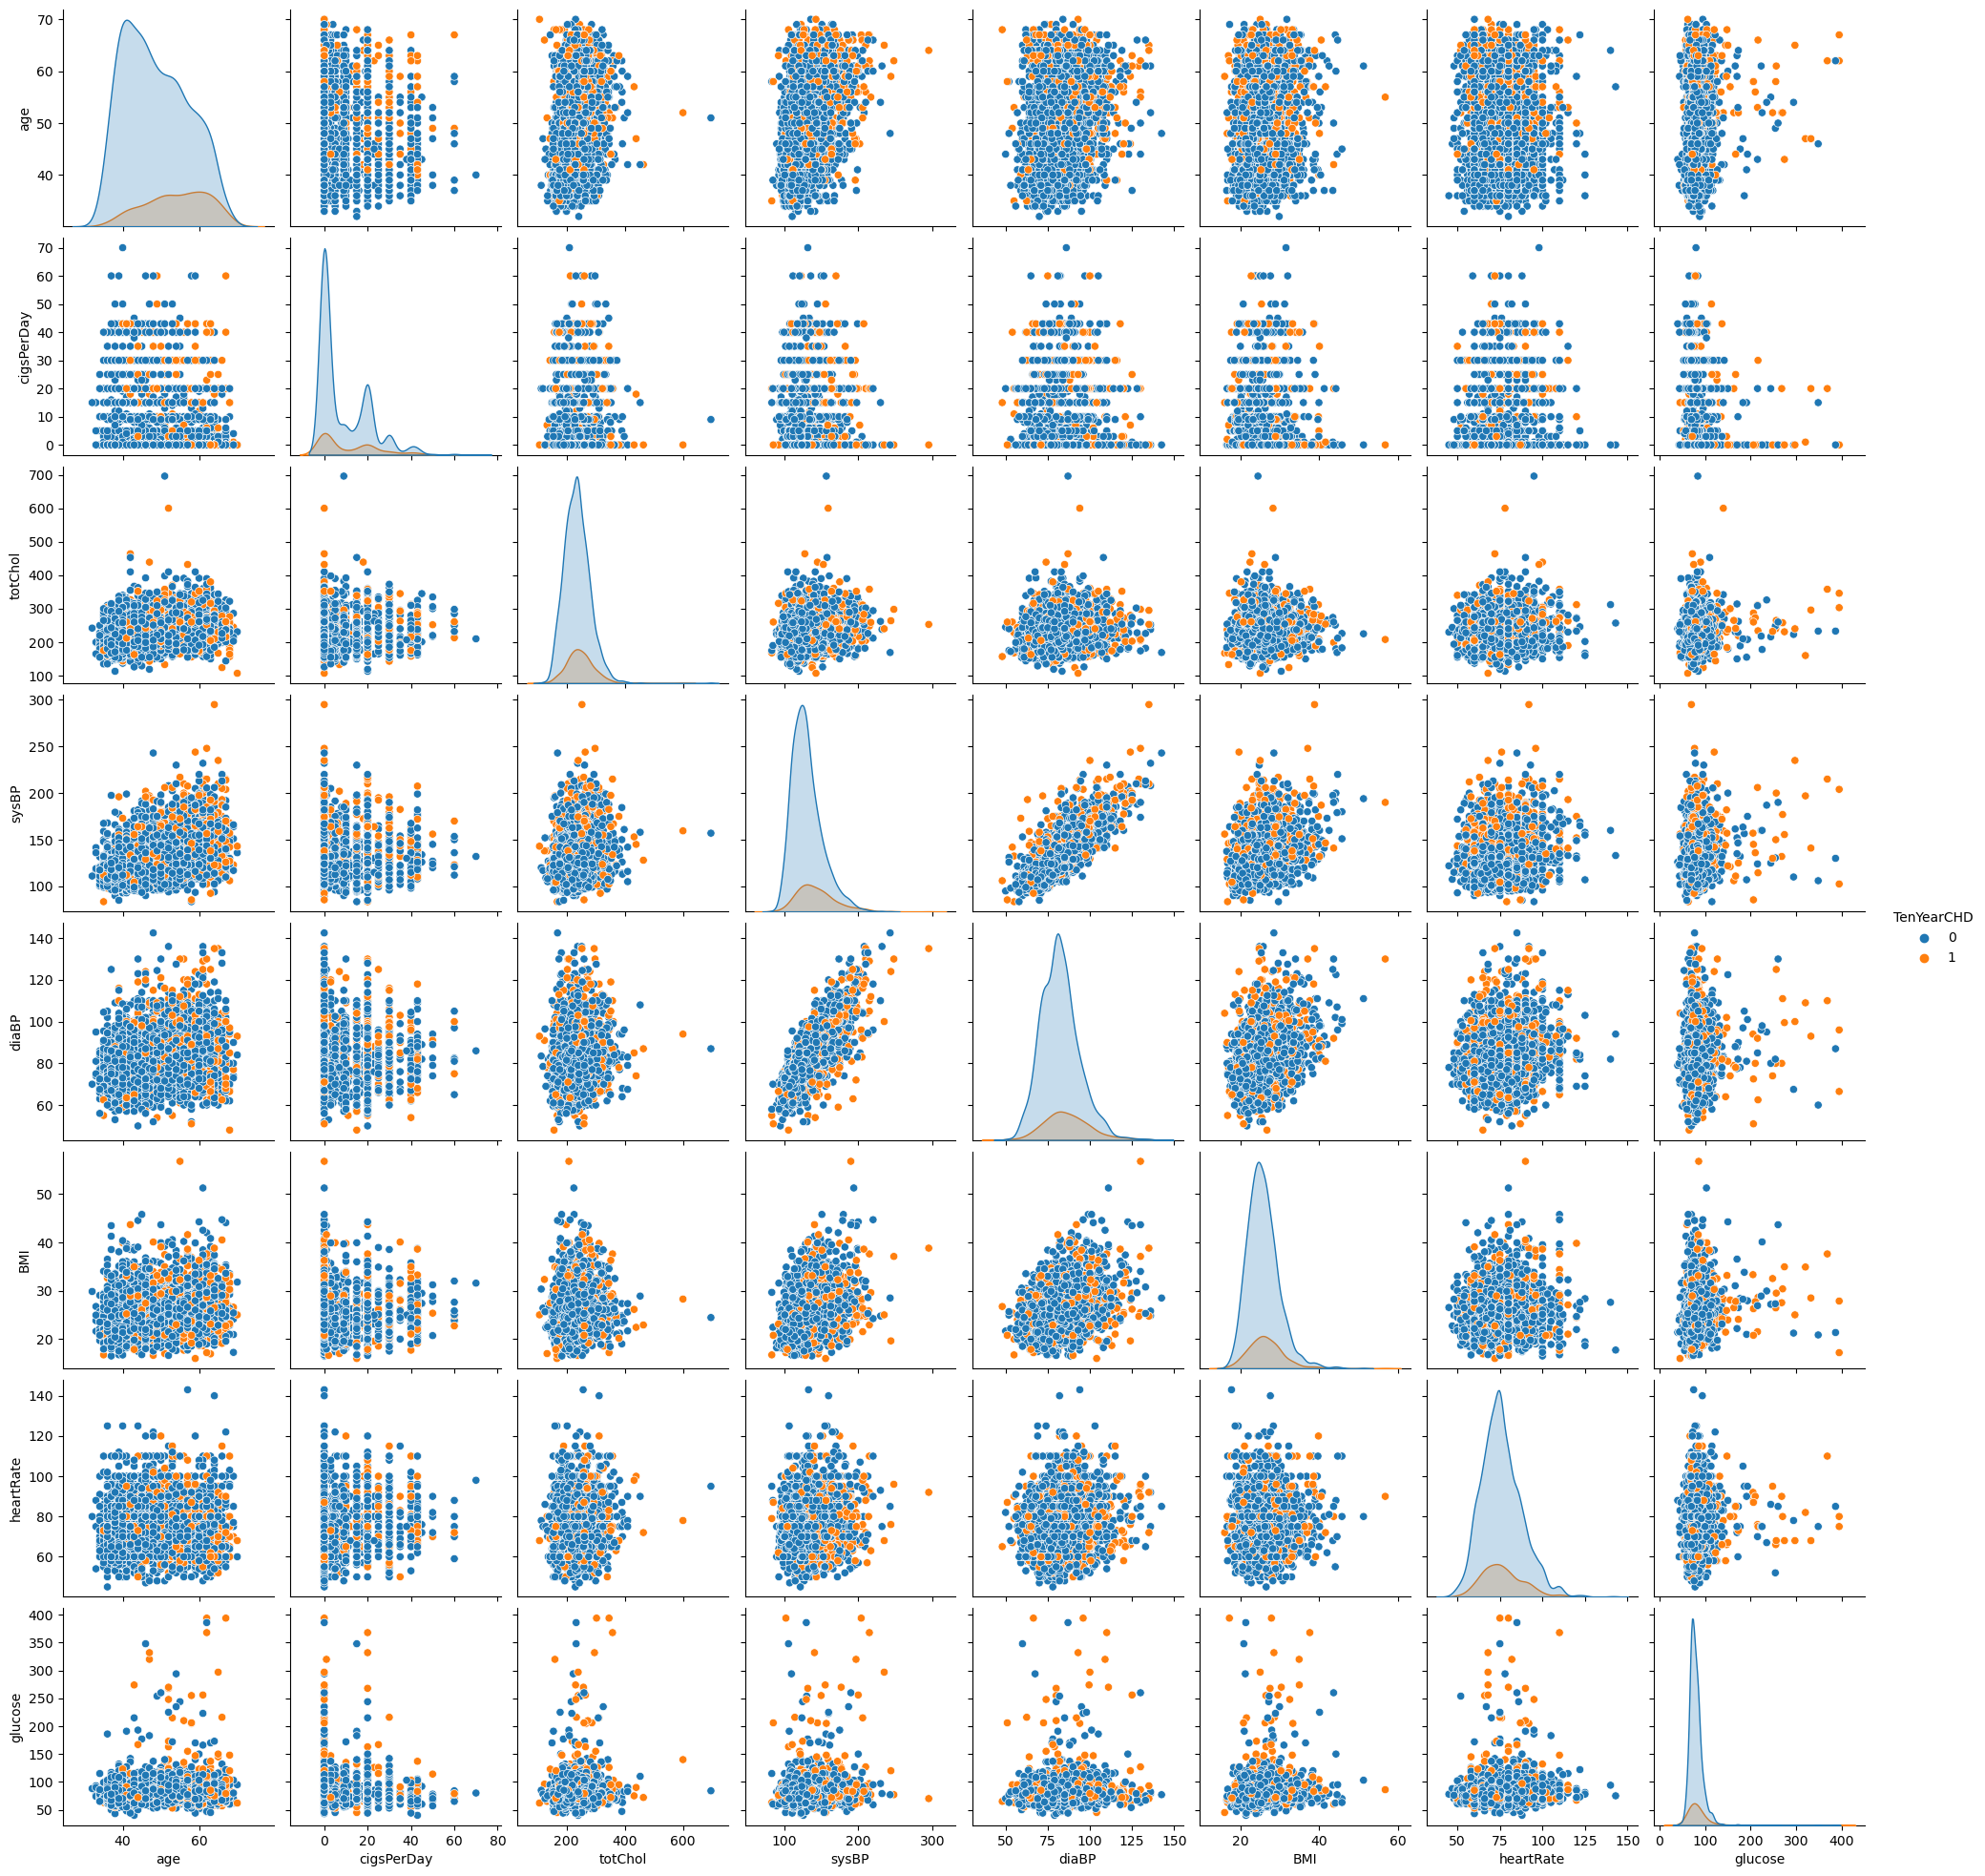

In [48]:
sns.pairplot(df[['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']], hue='TenYearCHD')

<AxesSubplot:>

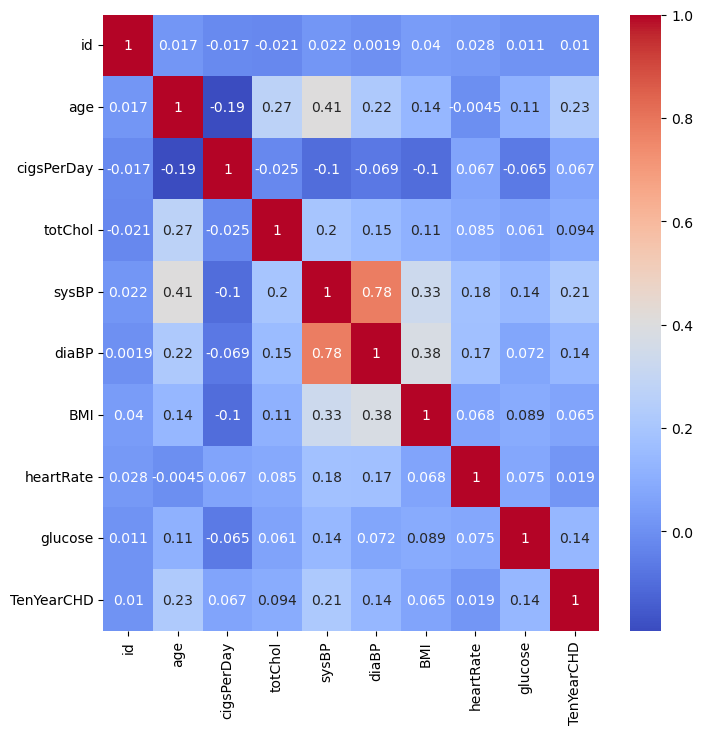

In [50]:
# finding the correlation in variables
plt.figure(figsize=(8,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### The Dataset in Imbalaced

In [28]:
# split the data into independent variable and dependent variable
x = df.drop(['TenYearCHD','id'], axis=1)
y = df['TenYearCHD']

In [29]:
x.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,64,2,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.00,90.0,80.0
1,36,4,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0
2,46,1,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0
3,50,1,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0
4,64,1,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0


### Balancing the data

In [30]:
# Using Random Over Sampler to Balace the dataset
import imblearn
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
x_ros, y_ros = ros.fit_resample(x,y)

In [31]:
x_ros.shape

(5716, 15)

In [32]:
y_ros.shape

(5716,)

In [33]:
print(y_ros.value_counts())

1    2858
0    2858
Name: TenYearCHD, dtype: int64


### Making Train Test Split

In [34]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.2, random_state=125)

In [35]:
x_train.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

### Scaling only Numeric feature using Standard Scaler

In [36]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scale_list = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']

x_train[scale_list] = scaler.fit_transform(x_train[scale_list])

In [37]:
x_train.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
1208,41,3,1,0,0.0,0.0,0,0,0,-0.556424,-0.977394,-1.278301,-0.223225,-0.935101,0.096470
1420,46,4,1,1,40.0,0.0,0,0,0,-1.623379,-1.222147,-0.191564,-0.330172,-1.353712,-0.221274
2812,55,2,1,0,0.0,0.0,0,0,0,1.449451,-0.447095,0.274180,0.158064,-0.683934,-0.443694
1849,63,2,0,0,0.0,1.0,0,1,0,0.894635,1.103009,0.118932,-0.337146,0.320734,-0.062402
5338,41,3,0,1,30.0,0.0,0,1,0,-1.153919,0.695087,1.205668,-1.299667,-0.851378,-0.189499


In [38]:
x_test[scale_list] = scaler.fit_transform(x_test[scale_list])

### Model Building
#### Random Forest Entropy & K Nearest Neighbore

In [39]:
#model 1 - RF criterion= entropy
classifier1 = RandomForestClassifier(criterion='entropy', random_state=14)
rfe = classifier1.fit(x_train, y_train)
#prediction
y_pred_rfe = classifier1.predict(x_test)
#evaluation
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)


#model 2 - KNN
classifier2 = KNeighborsClassifier()
knn = classifier2.fit(x_train, y_train)
#prediction
y_pred_knn = classifier2.predict(x_test)
#evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)

             Method Used  Accuracy
0  Random Forest Entropy  0.979895
1   K Nearest Neighbores  0.790210
AxesSubplot(0.125,0.11;0.775x0.77)


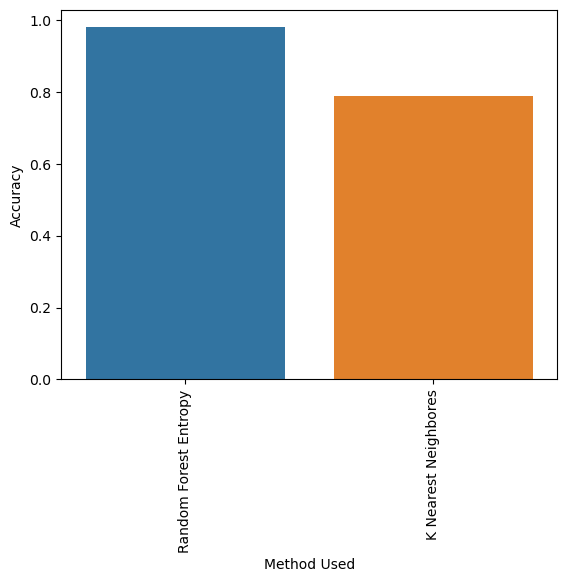

In [40]:
list1 = ['Random Forest Entropy','K Nearest Neighbores']
list2 = [accuracy_rfe, accuracy_knn]
list3 = [classifier1,classifier2]

df_accuracy = pd.DataFrame({'Method Used':list1, 'Accuracy':list2})
print(df_accuracy)

charts = sns.barplot(x='Method Used',  y='Accuracy', data=df_accuracy)
charts.set_xticklabels(charts.get_xticklabels(),rotation=90)
print(charts)

### Random Forest Entropy is giving Much better result. Lets check its training accuracy

In [41]:
#Training prediction
y_train_pred_rfe = classifier1.predict(x_train)
#evaluation
train_accuracy_rfe = accuracy_score(y_train, y_train_pred_rfe)

In [42]:
print(train_accuracy_rfe)

1.0


In [43]:
#accuracy score
#accuracy_training_ent = accuracy_score(y_train,y_pred_train)
#accuracy_testing_ent = accuracy_score(y_test,y_pred_test)

print('RF Entropy Training Accuracy = {}'.format(train_accuracy_rfe))
print('RF Entropy Testing Accuracy = {}'.format(accuracy_rfe))

# confusion Matrix
print(confusion_matrix(y_train,y_train_pred_rfe))
print(confusion_matrix(y_test,y_pred_rfe))

# Classification report
print(classification_report(y_train,y_train_pred_rfe))
print(classification_report(y_test,y_pred_rfe))

RF Entropy Training Accuracy = 1.0
RF Entropy Testing Accuracy = 0.9798951048951049
[[2277    0]
 [   0 2295]]
[[558  23]
 [  0 563]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2277
           1       1.00      1.00      1.00      2295

    accuracy                           1.00      4572
   macro avg       1.00      1.00      1.00      4572
weighted avg       1.00      1.00      1.00      4572

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       581
           1       0.96      1.00      0.98       563

    accuracy                           0.98      1144
   macro avg       0.98      0.98      0.98      1144
weighted avg       0.98      0.98      0.98      1144



### Confusion Matrix

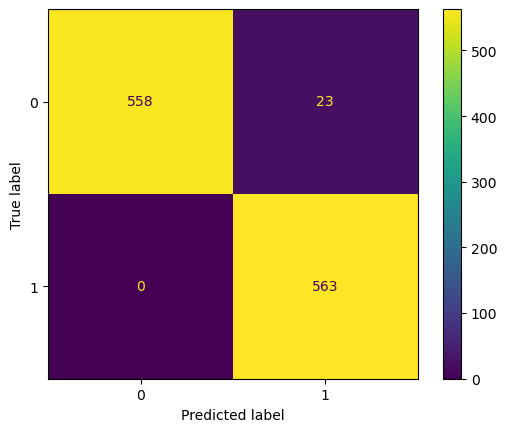

In [44]:
#creating confusion matrix
plot_confusion_matrix(classifier1, x_test, y_test)

In [45]:
# plotting ROC AUC Curve
roc_auc = roc_auc_score(y_test, y_pred_rfe)
roc_auc

0.9802065404475043

In [46]:
def plot_roc(y_test, y_pred_rfe):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_rfe)


    
    plt.title("Receiver Operating Characteristic")
    plt.plot(fpr, tpr, label = 'ROC Curve (area=%0.2f)'%roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel("True Positive Rate")
    plt.xlabel('False Positive Rate')
    plt.show()

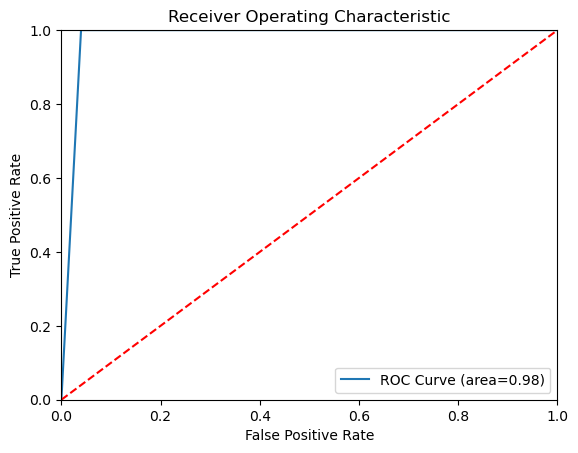

In [47]:
plot_roc(y_test, y_pred_rfe)

### Conclusion

#### Random Forest Entropy Model name 'classifier1' train accuracy : 100 %, Test accuracy = 96 %.

#### The confusion matrix tells us that from the prediction, of our model is brilliant. It is accurately predicting actual to the predicted values, 28 times it has predicted positive risk for the negative risk, on the other hand it has predicted negative risk to the positive risk, which I find fair in this case of Health Care Domain.

#### We need more data to check the model performance and to train the model robustly.<br>Having more crucial features, for example, Family History : whether there was any case of Cardiovascular disease in person's family background. And more specific data like 'Fasting Blood Sugar (Before Meals)', 'Post-Meal Blood Sugar (After Meals)' and 'HbA1c (Glycated Hemoglobin) Levels'.